In [17]:
!pip install numpy
!pip install matplotlib
!pip install tensorflow==1.15
!pip install tensorflow-logging


ERROR: Could not find a version that satisfies the requirement tensorflow==1.15 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==1.15
ERROR: Could not find a version that satisfies the requirement tensorflow-logging (from versions: none)
ERROR: No matching distribution found for tensorflow-logging


In [18]:
!pip3 install https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.14.0-py3-none-any.whl


     -------------------------------------- 105.8/105.8 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 50.7/50.7 kB 2.7 MB/s eta 0:00:00
     ------------------------------------ 488.5/488.5 kB 926.9 kB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0
    Uninstalling tensorflow-2.13.0:
      Successfully uninstalled tensorflow-2.13.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 1.14.0 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 1.14.0 which is incompatible.


In [42]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

len(x_train)
# 60000

len(x_test)
# 10000

# Finding the shape of individual sample
x_train[0].shape
# (28, 28)

(28, 28)

In [44]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

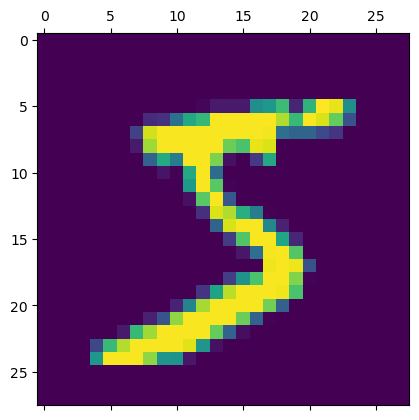

In [45]:
plt.matshow(x_train[0])

In [46]:
y_train[0]

# 5

5

In [47]:
# Show first 5 data
y_train[:5]

# array([5, 0, 4, 1, 9], dtype=uint8)

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
x_train.shape


(60000, 28, 28)

In [49]:
# Scale the data so that the values are from 0 - 1
x_train = x_train / 255
x_test = x_test / 255

In [50]:
# Flattening the train and test data
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [51]:
x_train_flattened.shape


(60000, 784)

In [52]:
x_train_flattened.shape


(60000, 784)

In [53]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 823us/step - loss: 0.4638 - accuracy: 0.8795
Epoch 2/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.3029 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 800us/step - loss: 0.2827 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 795us/step - loss: 0.2730 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 815us/step - loss: 0.2663 - accuracy: 0.9255


In [54]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 745us/step - loss: 0.2678 - accuracy: 0.9264


[0.26775941252708435, 0.9264000058174133]

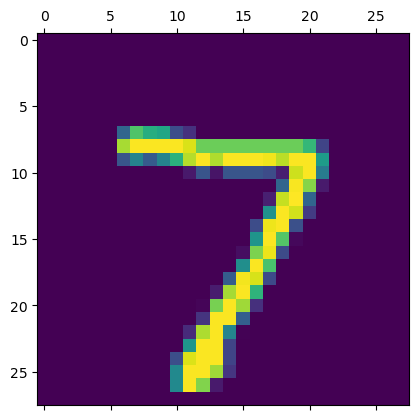

In [55]:
# Show the image
plt.matshow(x_test[0])

In [56]:
# Make the predictions
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([1.8693238e-02, 2.5351633e-07, 3.8469851e-02, 9.5759392e-01,
       2.0694137e-03, 1.0928032e-01, 1.0289272e-06, 9.9976790e-01,
       6.6316605e-02, 6.9463903e-01], dtype=float32)

313/313 [==============================] - 0s 630us/step


NameError: name 'array' is not defined

In [57]:
# Find the maximum value using numpy
np.argmax(y_predicted[0])

7

In [58]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    3,    2,    0,    7,    6,    3,    3,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    8,  935,   15,    9,    6,   11,   10,   32,    3],
       [   2,    0,   21,  905,    0,   40,    2,   12,   20,    8],
       [   1,    2,    4,    2,  923,    0,   10,    4,    5,   31],
       [   7,    3,    4,   18,    8,  802,   11,    6,   27,    6],
       [  10,    3,    8,    1,    8,   20,  903,    2,    3,    0],
       [   1,    6,   24,    5,    7,    0,    0,  963,    1,   21],
       [   6,   10,    7,   20,    9,   39,    8,   14,  855,    6],
       [   9,    7,    2,   10,   30,    9,    0,   33,    5,  904]])>

Text(95.72222222222221, 0.5, 'Truth')

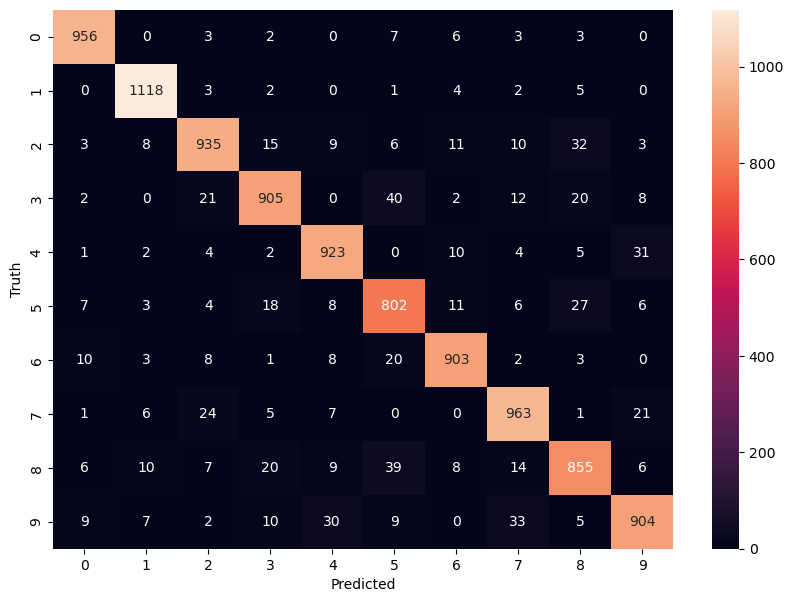

In [60]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1227 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0660 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0517 - accuracy: 0.9841


In [62]:
model.evaluate(x_test_flattened, y_test)


313/313 [==============================] - 0s 873us/step - loss: 0.0846 - accuracy: 0.9740


[0.08456415683031082, 0.9739999771118164]

313/313 [==============================] - 0s 744us/step


Text(95.72222222222221, 0.5, 'Truth')

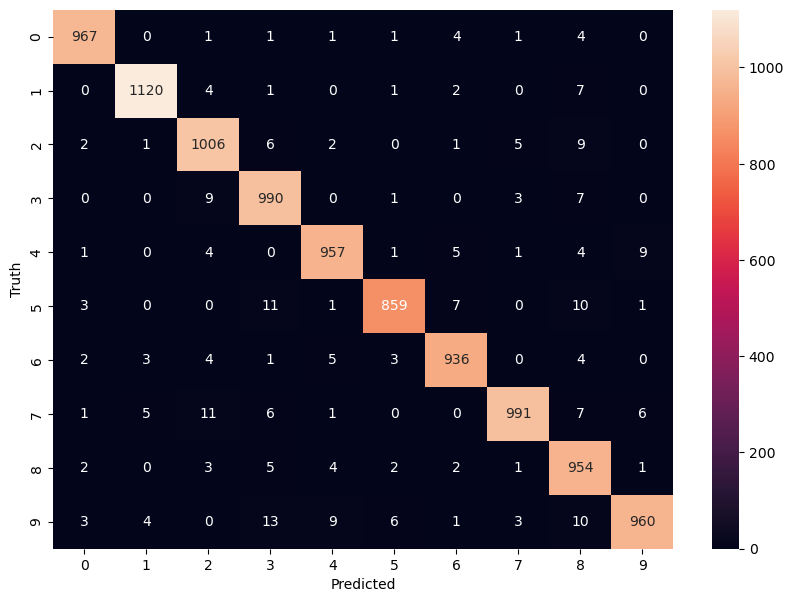

In [63]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')